In [59]:
from scipy.io import loadmat
import numpy as np
from nilearn import *
import matplotlib.pyplot as plt

In [2]:
Graphs303_Similarity = loadmat('../graph_learning/graph_data/303_graph_SimWindowWeighted.mat')
Graphs303_Sparsity = loadmat('../graph_learning/graph_data/303_graph_SparWindowWeighted.mat')
Graphs303_Pearson = loadmat('../graph_learning/graph_data/303_graph_PearWindowWeighted.mat')
Graphs303_Smoothness = loadmat('../graph_learning/graph_data/303_graph_SmoothWindowWeighted.mat')

Graphs375_Similarity = loadmat('../graph_learning/graph_data/375_graph_SimWindowWeighted.mat')
Graphs375_Sparsity = loadmat('../graph_learning/graph_data/375_graph_SparWindowWeighted.mat')
Graphs375_Pearson = loadmat('../graph_learning/graph_data/375_graph_PearWindowWeighted.mat')
Graphs375_Smoothness = loadmat('../graph_learning/graph_data/375_graph_SmoothWindowWeighted.mat')

Graphs378_Similarity = loadmat('../graph_learning/graph_data/378_graph_SimWindowWeighted.mat')
Graphs378_Sparsity = loadmat('../graph_learning/graph_data/378_graph_SparWindowWeighted.mat')
Graphs378_Pearson = loadmat('../graph_learning/graph_data/378_graph_PearWindowWeighted.mat')
Graphs378_Smoothness = loadmat('../graph_learning/graph_data/378_graph_SmoothWindowWeighted.mat')

Graphs797_Similarity = loadmat('../graph_learning/graph_data/797_graph_SimWindowWeighted.mat')
Graphs797_Sparsity = loadmat('../graph_learning/graph_data/797_graph_SparWindowWeighted.mat')
Graphs797_Pearson = loadmat('../graph_learning/graph_data/797_graph_PearWindowWeighted.mat')
Graphs797_Smoothness = loadmat('../graph_learning/graph_data/797_graph_SmoothWindowWeighted.mat')

Graphs820_Similarity = loadmat('../graph_learning/graph_data/820_graph_SimWindowWeighted.mat')
Graphs820_Sparsity = loadmat('../graph_learning/graph_data/820_graph_SparWindowWeighted.mat')
Graphs820_Pearson = loadmat('../graph_learning/graph_data/820_graph_PearWindowWeighted.mat')
Graphs820_Smoothness = loadmat('../graph_learning/graph_data/820_graph_SmoothWindowWeighted.mat')

nodeLabels = loadmat('nodeLabels.mat')
layouts = loadmat('../extract_data/nodeLayouts.mat')

In [3]:
Graphs303Sim = Graphs303_Similarity['Graphs_W']
Graphs303Spar = Graphs303_Sparsity['Graphs_W']
Graphs303Pear = Graphs303_Pearson['Graphs_W']
Graphs303Smooth = Graphs303_Smoothness['Graphs_W']

Graphs375Sim = Graphs375_Similarity['Graphs_W']
Graphs375Spar = Graphs375_Sparsity['Graphs_W']
Graphs375Pear = Graphs375_Pearson['Graphs_W']
Graphs375Smooth = Graphs375_Smoothness['Graphs_W']

Graphs378Sim = Graphs378_Similarity['Graphs_W']
Graphs378Spar = Graphs378_Sparsity['Graphs_W']
Graphs378Pear = Graphs378_Pearson['Graphs_W']
Graphs378Smooth = Graphs378_Smoothness['Graphs_W']

Graphs797Sim = Graphs797_Similarity['Graphs_W']
Graphs797Spar = Graphs797_Sparsity['Graphs_W']
Graphs797Pear = Graphs797_Pearson['Graphs_W']
Graphs797Smooth = Graphs797_Smoothness['Graphs_W']

Graphs820Sim = Graphs820_Similarity['Graphs_W']
Graphs820Spar = Graphs820_Sparsity['Graphs_W']
Graphs820Pear = Graphs820_Pearson['Graphs_W']
Graphs820Smooth = Graphs820_Smoothness['Graphs_W']

node = np.array(["R9R","R9L","R10R","R10L","R11R","R11L","R45R","R45L","R44R","R44L","R22R","R22L","R24R","R24L","R46R","R46L","R47R","R47L","R13R","R13L","R32R","R32L","R38R","R38L","R40R","R40L"])
layout = layouts['locs']

In [41]:
# Sum adjacency over time for all subjects
Sim303 = np.sum(Graphs303Sim/np.max(Graphs303Sim),axis=2)
Spar303 = np.sum(Graphs303Spar/np.max(Graphs303Spar),axis=2)
Pear303 = np.sum(Graphs303Pear/np.max(Graphs303Pear),axis=2)
Smooth303 = np.sum(Graphs303Smooth/np.max(Graphs303Smooth),axis=2)

Sim375 = np.sum(Graphs375Sim/np.max(Graphs375Sim),axis=2)
Spar375 = np.sum(Graphs375Spar/np.max(Graphs375Spar),axis=2)
Pear375 = np.sum(Graphs375Pear/np.max(Graphs375Pear),axis=2)
Smooth375 = np.sum(Graphs375Smooth/np.max(Graphs375Smooth),axis=2)

Sim378 = np.sum(Graphs378Sim/np.max(Graphs378Sim),axis=2)
Spar378 = np.sum(Graphs378Spar/np.max(Graphs378Spar),axis=2)
Pear378 = np.sum(Graphs378Pear/np.max(Graphs378Pear),axis=2)
Smooth378 = np.sum(Graphs378Smooth/np.max(Graphs378Smooth),axis=2)

Sim797 = np.sum(Graphs797Sim/np.max(Graphs797Sim),axis=2)
Spar797 = np.sum(Graphs797Spar/np.max(Graphs797Spar),axis=2)
Pear797 = np.sum(Graphs797Pear/np.max(Graphs797Pear),axis=2)
Smooth797 = np.sum(Graphs797Smooth/np.max(Graphs797Smooth),axis=2)

Sim820 = np.sum(Graphs820Sim/np.max(Graphs820Sim),axis=2)
Spar820 = np.sum(Graphs820Spar/np.max(Graphs820Spar),axis=2)
Pear820 = np.sum(Graphs820Pear/np.max(Graphs820Pear),axis=2)
Smooth820 = np.sum(Graphs820Smooth/np.max(Graphs820Smooth),axis=2)

In [48]:
N = Sim303.shape[0]

In [49]:
def thres(A1,k,Num):
    A = A1
    A2 = A1
    A = np.real(A)
    N = A.shape[0]
    P = A[np.triu_indices(N, k=1)]
    S = np.sort(np.ravel(P))[::-1] # symmetric, upper triangle
    val = S[k-1]
    K = k-2
    
    while(val==0 and K>=0):
        val = S[K]
        K -= 1
    
    W1 = A2
    W1 = np.where(W1 > val, 1, 0)
    
    top = A2
    val1 = S[Num]
    W2 = np.where(top > val1, 10, 0)
    
    W = np.maximum(W1,W2)
    
    return W

In [50]:
# Thresholding

Sim_303 = thres(Sim303,N,3)
Spar_303 = thres(Spar303,N,3)
Pear_303 = thres(Pear303,N,3)
Smooth_303 = thres(Smooth303,N,3)

Sim_375 = thres(Sim375,N,3)
Spar_375 = thres(Spar375,N,3)
Pear_375 = thres(Pear375,N,3)
Smooth_375 = thres(Smooth375,N,3)

Sim_378 = thres(Sim378,N,3)
Spar_378 = thres(Spar378,N,3)
Pear_378 = thres(Pear378,N,3)
Smooth_378 = thres(Smooth378,N,3)

Sim_797 = thres(Sim797,N,3)
Spar_797 = thres(Spar797,N,3)
Pear_797 = thres(Pear797,N,3)
Smooth_797 = thres(Smooth797,N,3)

Sim_820 = thres(Sim820,N,3)
Spar_820 = thres(Spar820,N,3)
Pear_820 = thres(Pear820,N,3)
Smooth_820 = thres(Smooth820,N,3)

In [78]:
colormap = plt.get_cmap('hsv')

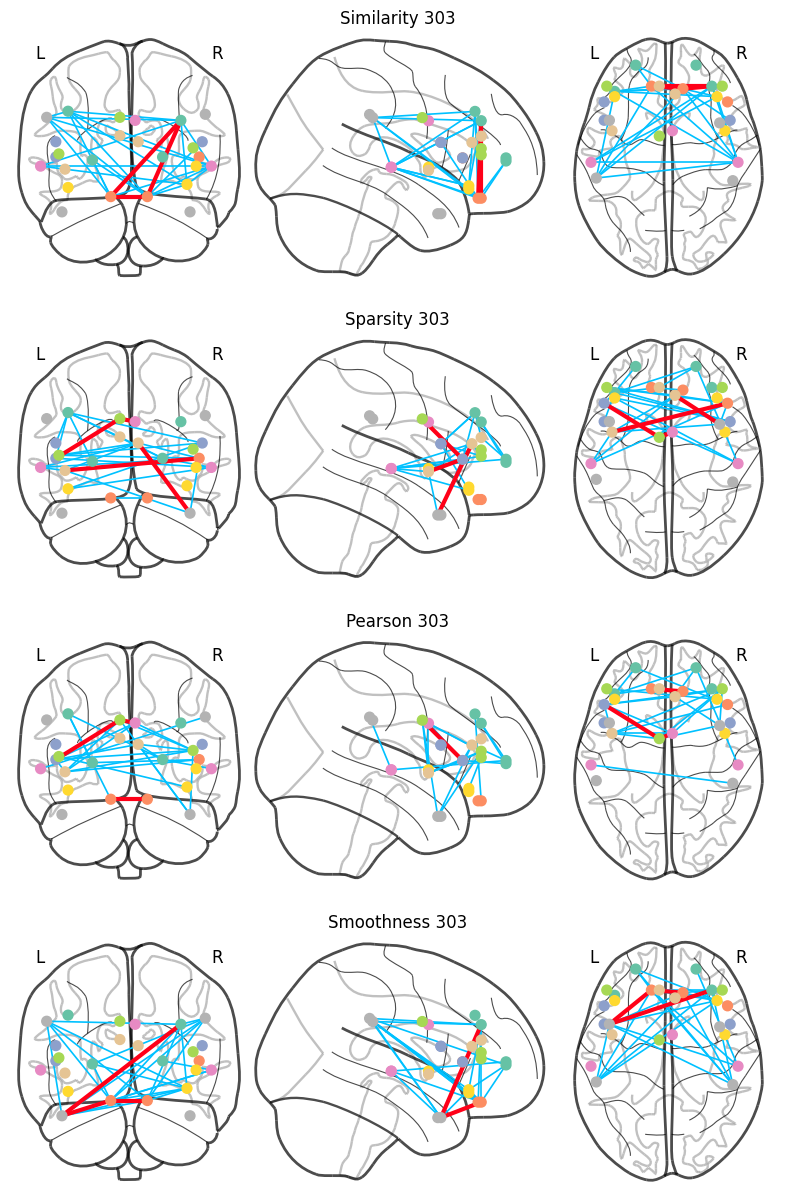

In [81]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15))
nilearn.plotting.plot_connectome(Sim_303,layout,edge_cmap=colormap,axes=axes[0])
nilearn.plotting.plot_connectome(Spar_303,layout,edge_cmap=colormap,axes=axes[1])
nilearn.plotting.plot_connectome(Pear_303,layout,edge_cmap=colormap,axes=axes[2])
nilearn.plotting.plot_connectome(Smooth_303,layout,edge_cmap=colormap,axes=axes[3])
axes[0].set_title('Similarity 303')
axes[1].set_title('Sparsity 303')
axes[2].set_title('Pearson 303')
axes[3].set_title('Smoothness 303')
plt.show()

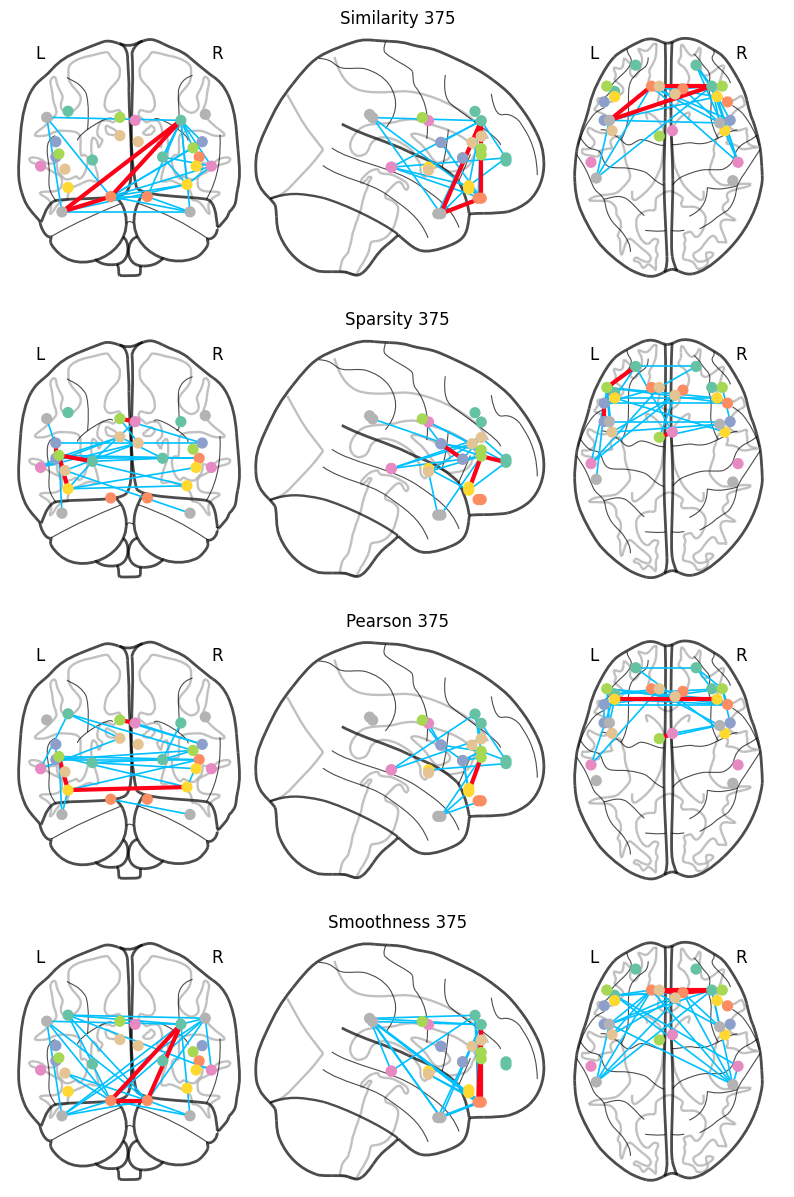

In [82]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15))
nilearn.plotting.plot_connectome(Sim_375,layout,edge_cmap=colormap,axes=axes[0])
nilearn.plotting.plot_connectome(Spar_375,layout,edge_cmap=colormap,axes=axes[1])
nilearn.plotting.plot_connectome(Pear_375,layout,edge_cmap=colormap,axes=axes[2])
nilearn.plotting.plot_connectome(Smooth_375,layout,edge_cmap=colormap,axes=axes[3])
axes[0].set_title('Similarity 375')
axes[1].set_title('Sparsity 375')
axes[2].set_title('Pearson 375')
axes[3].set_title('Smoothness 375')
plt.show()

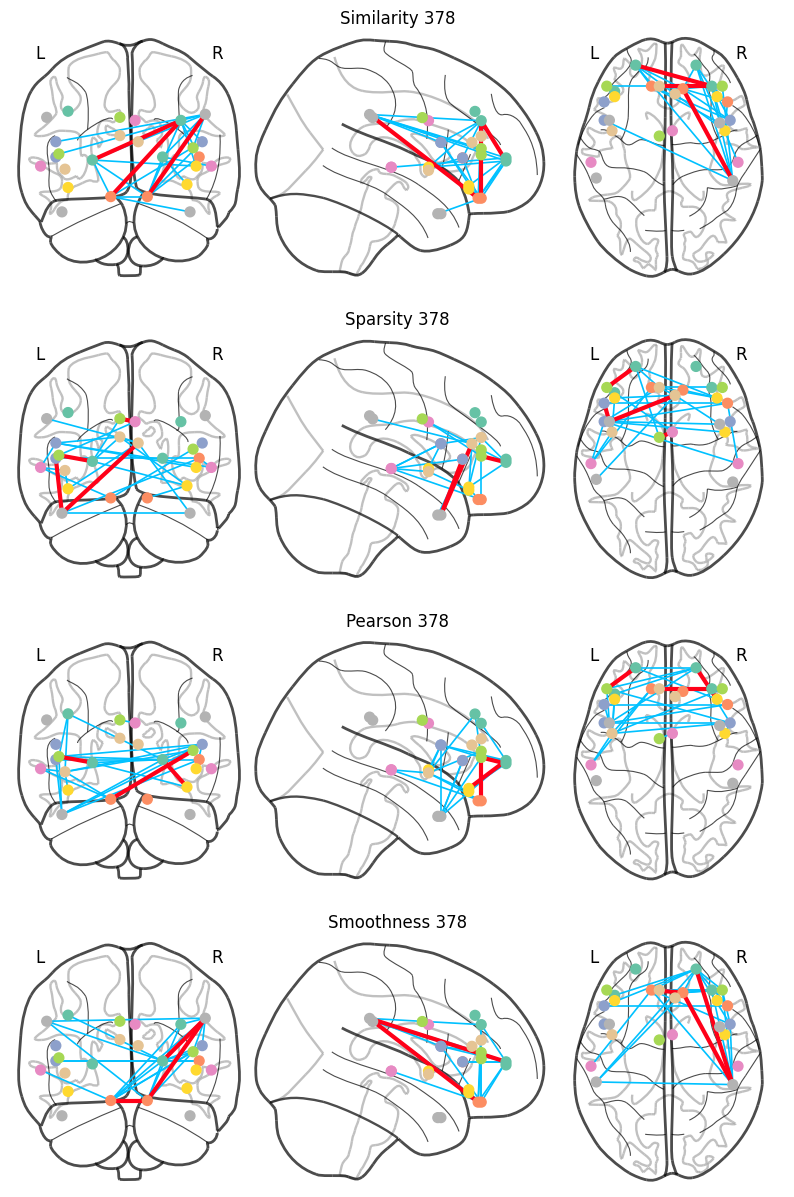

In [83]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15))
nilearn.plotting.plot_connectome(Sim_378,layout,edge_cmap=colormap,axes=axes[0])
nilearn.plotting.plot_connectome(Spar_378,layout,edge_cmap=colormap,axes=axes[1])
nilearn.plotting.plot_connectome(Pear_378,layout,edge_cmap=colormap,axes=axes[2])
nilearn.plotting.plot_connectome(Smooth_378,layout,edge_cmap=colormap,axes=axes[3])
axes[0].set_title('Similarity 378')
axes[1].set_title('Sparsity 378')
axes[2].set_title('Pearson 378')
axes[3].set_title('Smoothness 378')
plt.show()

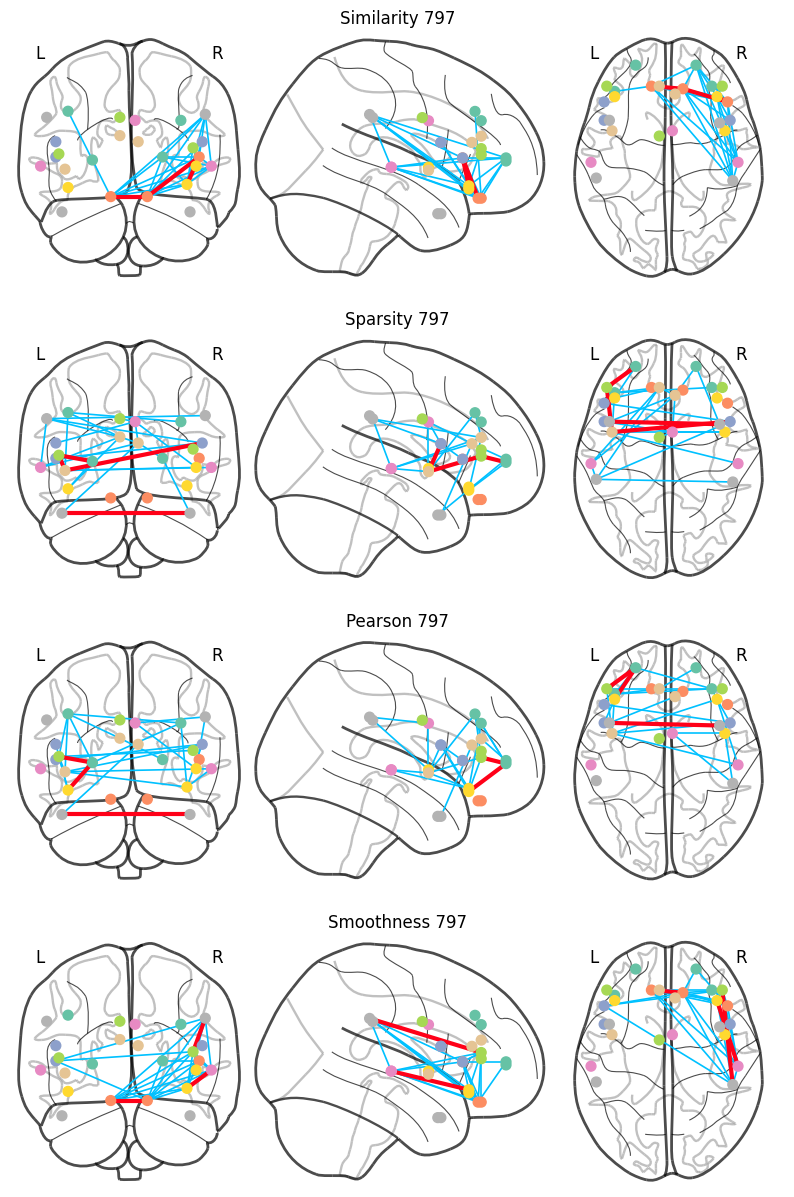

In [84]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15))
nilearn.plotting.plot_connectome(Sim_797,layout,edge_cmap=colormap,axes=axes[0])
nilearn.plotting.plot_connectome(Spar_797,layout,edge_cmap=colormap,axes=axes[1])
nilearn.plotting.plot_connectome(Pear_797,layout,edge_cmap=colormap,axes=axes[2])
nilearn.plotting.plot_connectome(Smooth_797,layout,edge_cmap=colormap,axes=axes[3])
axes[0].set_title('Similarity 797')
axes[1].set_title('Sparsity 797')
axes[2].set_title('Pearson 797')
axes[3].set_title('Smoothness 797')
plt.show()

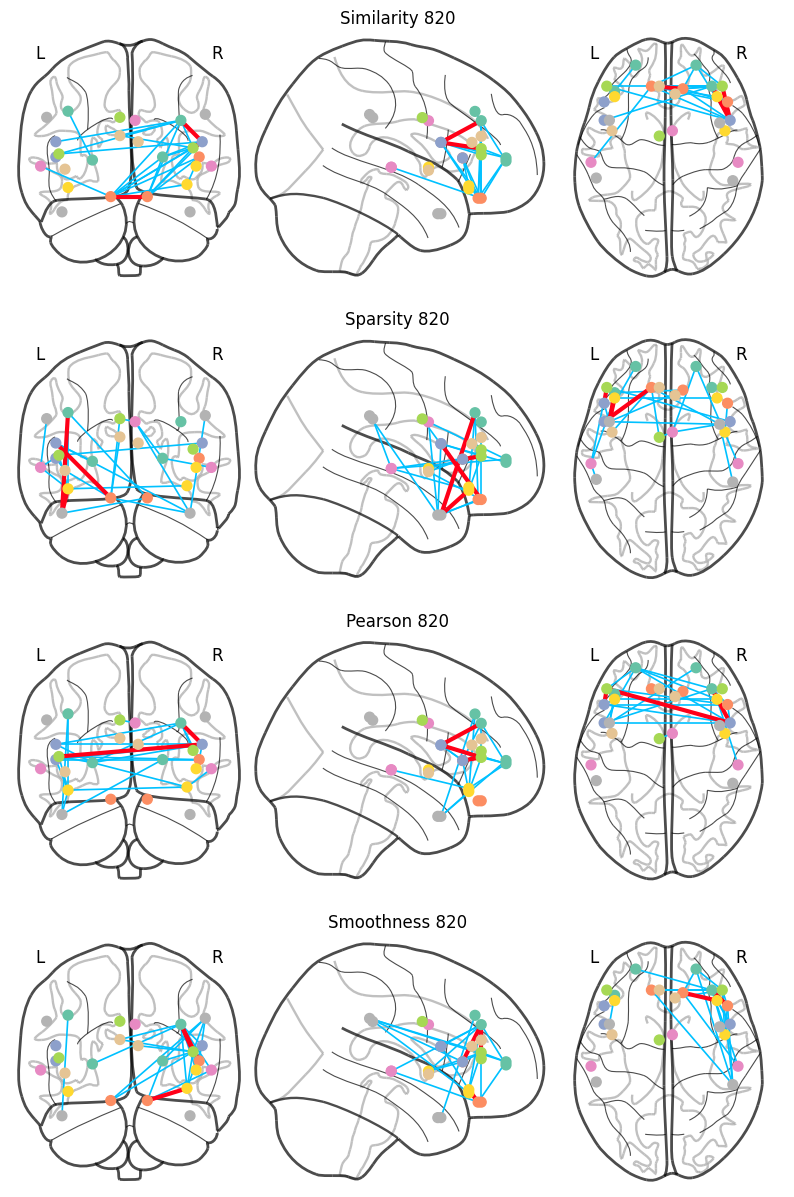

In [85]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15))
nilearn.plotting.plot_connectome(Sim_820,layout,edge_cmap=colormap,axes=axes[0])
nilearn.plotting.plot_connectome(Spar_820,layout,edge_cmap=colormap,axes=axes[1])
nilearn.plotting.plot_connectome(Pear_820,layout,edge_cmap=colormap,axes=axes[2])
nilearn.plotting.plot_connectome(Smooth_820,layout,edge_cmap=colormap,axes=axes[3])
axes[0].set_title('Similarity 820')
axes[1].set_title('Sparsity 820')
axes[2].set_title('Pearson 820')
axes[3].set_title('Smoothness 820')
plt.show()

In [91]:
# Average across subjects

Sim = Sim_303+Sim_375+Sim_378+Sim_797+Sim_820
Spar = Spar_303+Spar_375+Spar_378+Spar_797+Spar_820
Pear = Pear_303+Pear_375+Pear_378+Pear_797+Pear_820
Smooth = Smooth_303+Smooth_375+Smooth_378+Smooth_797+Smooth_820

Sim = thres(Sim,N,3)
Spar = thres(Spar,N,3)
Pear = thres(Pear,N,3)
Smooth = thres(Smooth,N,3)

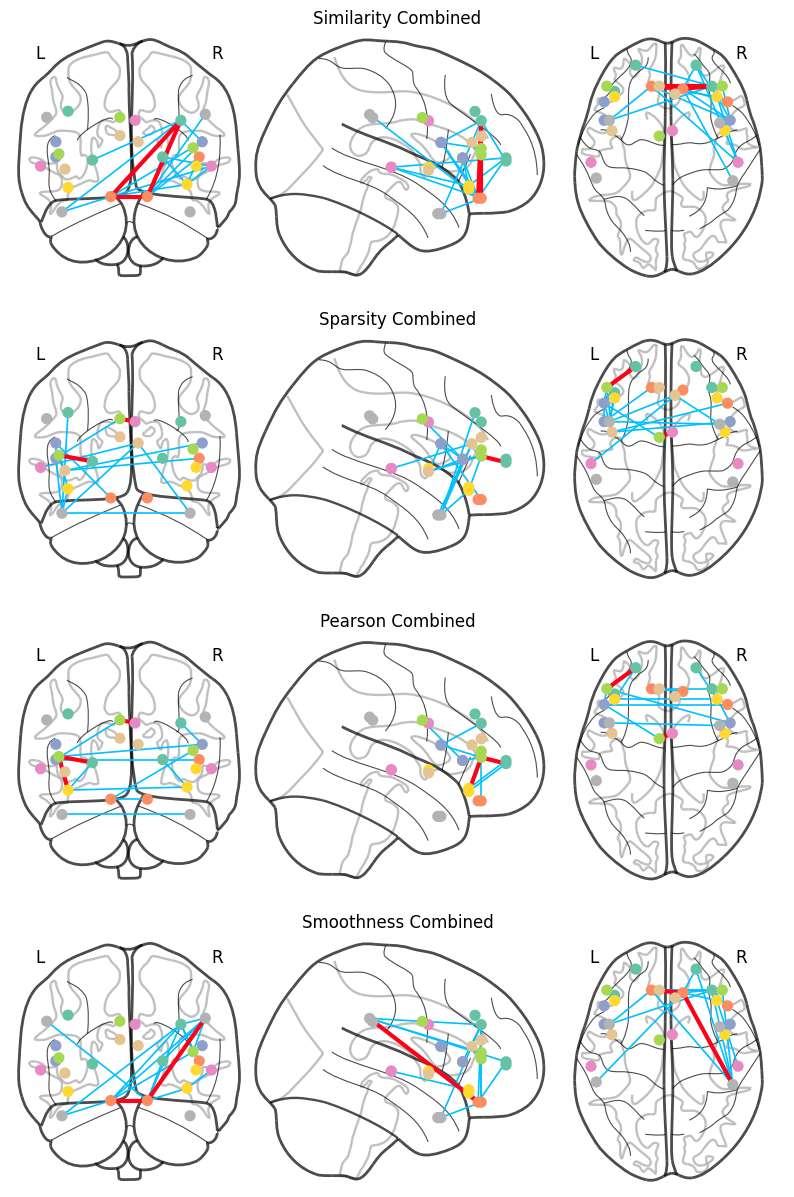

In [92]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15))
nilearn.plotting.plot_connectome(Sim,layout,edge_cmap=colormap,axes=axes[0])
nilearn.plotting.plot_connectome(Spar,layout,edge_cmap=colormap,axes=axes[1])
nilearn.plotting.plot_connectome(Pear,layout,edge_cmap=colormap,axes=axes[2])
nilearn.plotting.plot_connectome(Smooth,layout,edge_cmap=colormap,axes=axes[3])
axes[0].set_title('Similarity Combined')
axes[1].set_title('Sparsity Combined')
axes[2].set_title('Pearson Combined')
axes[3].set_title('Smoothness Combined')
plt.show()